This notebook contains all steps realated to data preprocessing.
Two configurations are applied to build up balanced dataset:
1) Per-vulnerability models
2) Combining all vulnerability types in one class


In [3]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First download the Draper dataset from : https://osf.io/d45bw/ to the './Dataset' directory.

Then uploading the 'Draper VDISC dataset, which contains train, validate and test subsets.

In [4]:
vdisc_train = h5py.File('./Dataset/VDISC_train.hdf5')
vdisc_validate = h5py.File('./Dataset/VDISC_validate.hdf5')
vdisc_test = h5py.File('./Dataset/VDISC_test.hdf5')

<ipython-input-4-f47f9fd913a9>:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  vdisc_train = h5py.File('./Dataset/VDISC_train.hdf5')
<ipython-input-4-f47f9fd913a9>:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  vdisc_validate = h5py.File('./Dataset/VDISC_validate.hdf5')
<ipython-input-4-f47f9fd913a9>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) i

Converting to Pandas

In [5]:
def convert_to_pandas(vdisc_h5py):
    data_frame = {
        'code': vdisc_h5py['functionSource'],
        'CWE-119': vdisc_h5py['CWE-119'],
        'CWE-120': vdisc_h5py['CWE-120'],
        'CWE-469': vdisc_h5py['CWE-469'],
        'CWE-476': vdisc_h5py['CWE-476'],
        'CWE-OTHERS': vdisc_h5py['CWE-other'],
    }
    return pd.DataFrame(data=data_frame)

In [6]:
vdisc_train_pandas = convert_to_pandas(vdisc_train)
vdisc_test_pandas = convert_to_pandas(vdisc_test)
vdisc_validate_pandas = convert_to_pandas(vdisc_validate)

Explor the dataset

In [7]:
vdisc_train_pandas.head()

,code,CWE-119,CWE-120,CWE-469,CWE-476,CWE-OTHERS
0,"clear_area(int startx, int starty, int xsize, ...",False,False,False,False,False
1,ReconstructDuList(Statement* head)\n{\n Sta...,False,False,False,False,False
2,free_speaker(void)\n{\n if(Lengths)\n ...,False,False,False,False,False
3,mlx4_register_device(struct mlx4_dev *dev)\n{\...,False,False,False,False,False
4,"Parse_Env_Var(void)\n{\n char *p = getenv(""LI...",True,True,False,False,True


In [8]:
vdisc_train_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019471 entries, 0 to 1019470
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1019471 non-null  object
 1   CWE-119     1019471 non-null  bool  
 2   CWE-120     1019471 non-null  bool  
 3   CWE-469     1019471 non-null  bool  
 4   CWE-476     1019471 non-null  bool  
 5   CWE-OTHERS  1019471 non-null  bool  
dtypes: bool(5), object(1)
memory usage: 12.6+ MB


Concatenate train, valid and test dataframes to make preprocessing and embedding processes easer. Later in the ML experiments dataset will be splitted up again

In [9]:
vdisc_joined = pd.concat([vdisc_train_pandas, vdisc_validate_pandas, vdisc_test_pandas], ignore_index=True)

In [10]:
vdisc_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1274366 non-null  object
 1   CWE-119     1274366 non-null  bool  
 2   CWE-120     1274366 non-null  bool  
 3   CWE-469     1274366 non-null  bool  
 4   CWE-476     1274366 non-null  bool  
 5   CWE-OTHERS  1274366 non-null  bool  
dtypes: bool(5), object(1)
memory usage: 15.8+ MB


Solving the problem of unbalanced dataset:

# 1) Per-vulnerability models
extracting seperate CWE dataframes

1) CWE-120

In [11]:
cols_to_drop = ["CWE-119", "CWE-469", "CWE-476", "CWE-OTHERS"]
CWE_120_df = vdisc_joined.drop(cols_to_drop, axis=1)

2) CWE-119

In [12]:
cols_to_drop = ["CWE-120", "CWE-469", "CWE-476", "CWE-OTHERS"]
CWE_119_df = vdisc_joined.drop(cols_to_drop, axis=1)

3) CWE-469

In [13]:
cols_to_drop = ["CWE-120", "CWE-119", "CWE-476", "CWE-OTHERS"]
CWE_469_df = vdisc_joined.drop(cols_to_drop, axis=1)

4) CWE-476

In [14]:
cols_to_drop = ["CWE-120", "CWE-119", "CWE-469", "CWE-OTHERS"]
CWE_476_df = vdisc_joined.drop(cols_to_drop, axis=1)

5) CWE-OTHERS

In [15]:
cols_to_drop = ["CWE-120", "CWE-119", "CWE-469", "CWE-476"]
CWE_OTHERS_df = vdisc_joined.drop(cols_to_drop, axis=1)

In [16]:
CWE_120_df.head()

,code,CWE-120
0,"clear_area(int startx, int starty, int xsize, ...",False
1,ReconstructDuList(Statement* head)\n{\n Sta...,False
2,free_speaker(void)\n{\n if(Lengths)\n ...,False
3,mlx4_register_device(struct mlx4_dev *dev)\n{\...,False
4,"Parse_Env_Var(void)\n{\n char *p = getenv(""LI...",True


Checking up, how many samples (vulnerable & non-vulnerable) each CWE category has

In [17]:
CWE_120_df['CWE-120'].value_counts()

False    1226706
True       47660
Name: CWE-120, dtype: int64

In [18]:
CWE_119_df['CWE-119'].value_counts()

False    1250209
True       24157
Name: CWE-119, dtype: int64

In [19]:
CWE_469_df['CWE-469'].value_counts()

False    1271741
True        2625
Name: CWE-469, dtype: int64

In [20]:
CWE_476_df['CWE-476'].value_counts()

False    1262272
True       12094
Name: CWE-476, dtype: int64

In [21]:
CWE_OTHERS_df['CWE-OTHERS'].value_counts()

False    1239338
True       35028
Name: CWE-OTHERS, dtype: int64

Ploting the CWE-120 subset

/home/feras/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


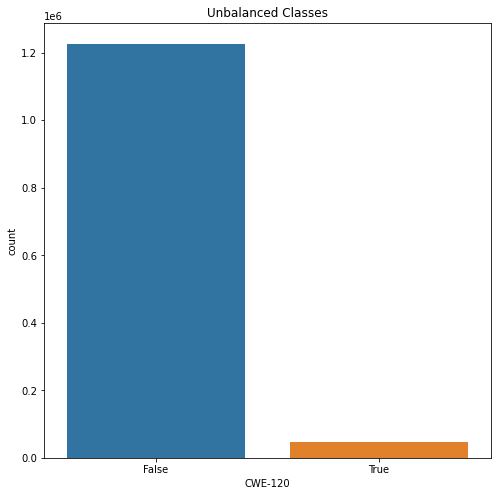

In [24]:
shuffled_df = CWE_120_df.sample(frac=1,random_state=4)
vul_df = shuffled_df.loc[shuffled_df['CWE-120'] == True]
non_vul_df = shuffled_df.loc[shuffled_df['CWE-120'] == False]
non_normalized_df = pd.concat([vul_df, non_vul_df])
plt.figure(figsize=(8, 8))
sns.countplot('CWE-120', data=non_normalized_df)
plt.title('Unbalanced Classes')
#plt.show()
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('imbalanced.png')

Applying under-sampling to generat a 50/50 non-vulnerable:vulnerable subset of CWE-120

/home/feras/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


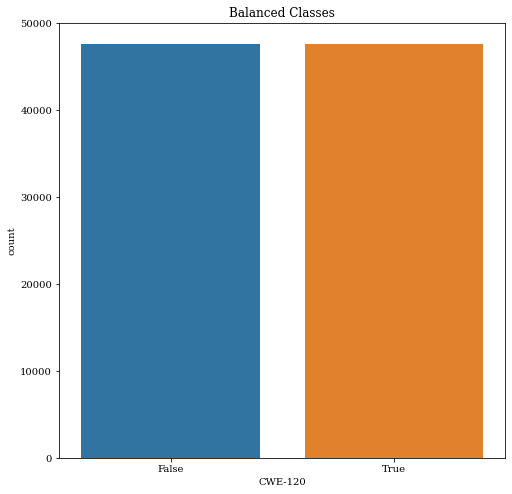

<Figure size 432x288 with 0 Axes>

In [25]:
#The idea of applying undersampling can be seen in the following tutorial:
# https://www.kdnuggets.com/2019/05/fix-unbalanced-dataset.html
shuffled_df = CWE_120_df.sample(frac=1,random_state=4)

# Put all the vulnerable class in a separate dataset.
vul_df = shuffled_df.loc[shuffled_df['CWE-120'] == True]

#Randomly select 47660 of observations from the non-vulnerable (majority class)to make 50/50 samples
non_vul_df = shuffled_df.loc[shuffled_df['CWE-120'] == 0].sample(n=47660,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([vul_df, non_vul_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('CWE-120', data=normalized_df)
plt.title('Balanced Classes')
plt.show()
plt.savefig('balanced.png')

Applying under-sampling on all CWE categories

In [26]:
#https://www.kdnuggets.com/2019/05/fix-unbalanced-dataset.html
# Shuffle the Dataset.
def undersampl(dataframe, vulnType, samples):
    shuffled_df = dataframe.sample(frac=1,random_state=4)

    # Put all the vulnerable class in a separate dataset.
    vul_df = shuffled_df.loc[shuffled_df[vulnType] == True]

    #Randomly select n samples of observations from the non-vulnerable (majority class)to make 50/50 samples
    non_vul_df = shuffled_df.loc[shuffled_df[vulnType] == 0].sample(n=samples,random_state=42)

    # Concatenate both dataframes again
    normalized_df = pd.concat([vul_df, non_vul_df])

    return normalized_df

In [27]:
normilized_CWE_120 = undersampl(CWE_120_df, 'CWE-120', 47660)
normilized_CWE_119 = undersampl(CWE_119_df, 'CWE-119', 24157)
normilized_CWE_469 = undersampl(CWE_469_df, 'CWE-469', 2625)
normilized_CWE_476 = undersampl(CWE_476_df, 'CWE-476', 12094)
normilized_CWE_OTHERS = undersampl(CWE_OTHERS_df, 'CWE-OTHERS', 35028)

Reset indices 

In [28]:
normilized_CWE_120.reset_index(inplace=True)
normilized_CWE_119.reset_index(inplace=True)
normilized_CWE_469.reset_index(inplace=True)
normilized_CWE_476.reset_index(inplace=True)
normilized_CWE_OTHERS.reset_index(inplace=True)

Adding "type" column to each CWE dataframe

In [29]:
normilized_CWE_120['type'] = "CWE_120"
normilized_CWE_119['type'] = "CWE_119"
normilized_CWE_469['type'] = "CWE_469"
normilized_CWE_476['type'] = "CWE_476"
normilized_CWE_OTHERS['type'] = "CWE_OTHERS"

In [30]:
normilized_CWE_120.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95320 entries, 0 to 95319
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    95320 non-null  int64 
 1   code     95320 non-null  object
 2   CWE-120  95320 non-null  bool  
 3   type     95320 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 2.3+ MB


Reorgenize each dataframe

In [31]:
normilized_CWE_120.columns = ['testCase_ID', 'code', 'bug', 'type']
normilized_CWE_119.columns = ['testCase_ID', 'code', 'bug', 'type']
normilized_CWE_469.columns = ['testCase_ID', 'code', 'bug', 'type']
normilized_CWE_476.columns = ['testCase_ID', 'code', 'bug', 'type']
normilized_CWE_OTHERS.columns = ['testCase_ID', 'code', 'bug', 'type']

In [32]:
normilized_CWE_120.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95320 entries, 0 to 95319
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   testCase_ID  95320 non-null  int64 
 1   code         95320 non-null  object
 2   bug          95320 non-null  bool  
 3   type         95320 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 2.3+ MB


In [33]:
normilized_CWE_120['testCase_ID'] = normilized_CWE_120.index
normilized_CWE_119['testCase_ID'] = normilized_CWE_119.index
normilized_CWE_469['testCase_ID'] = normilized_CWE_469.index
normilized_CWE_476['testCase_ID'] = normilized_CWE_476.index
normilized_CWE_OTHERS['testCase_ID'] = normilized_CWE_OTHERS.index

In [34]:
normilized_CWE_120.head()

,testCase_ID,code,bug,type
0,0,"create_NUBspline_1d_z (NUgrid* x_grid, BCtype_...",True,CWE_120
1,1,m92_startup(void)\r\n{\r\n\tunsigned char *RAM...,True,CWE_120
2,2,"chirp_multi_lookup(const char *volume, const c...",True,CWE_120
3,3,"_parse(VisuConfigFileEntry *entry, gchar **tok...",True,CWE_120
4,4,CDE_create_path_symlink_dirs() {\n char *p;\n...,True,CWE_120


Adding a "filename" column to each dataframe, which should be a string or object needed as input for the Clang parser used later in "AST_extracting.ipynb"

In [35]:
def add_column(row):
    testCase_ID = row.testCase_ID

    return {
        "filename": str(testCase_ID) + "_vdisc.c"
    }

In [36]:
filename_CWE_120 = normilized_CWE_120.apply(add_column, axis=1, result_type="expand")
filename_CWE_119 = normilized_CWE_119.apply(add_column, axis=1, result_type="expand")
filename_CWE_469 = normilized_CWE_469.apply(add_column, axis=1, result_type="expand")
filename_CWE_476 = normilized_CWE_476.apply(add_column, axis=1, result_type="expand")
filename_CWE_OTHERS = normilized_CWE_OTHERS.apply(add_column, axis=1, result_type="expand")

In [37]:
filename_CWE_119.head()

,filename
0,0_vdisc.c
1,1_vdisc.c
2,2_vdisc.c
3,3_vdisc.c
4,4_vdisc.c


In [38]:
normilized_CWE_120_new= normilized_CWE_120.insert(1,"filename", filename_CWE_120, True)
normilized_CWE_119_new= normilized_CWE_119.insert(1,"filename", filename_CWE_119, True)
normilized_CWE_469_new= normilized_CWE_469.insert(1,"filename", filename_CWE_469, True)
normilized_CWE_476_new= normilized_CWE_476.insert(1,"filename", filename_CWE_476, True)
normilized_CWE_OTHERS_new= normilized_CWE_OTHERS.insert(1,"filename", filename_CWE_OTHERS, True)

In [39]:
normilized_CWE_120.head()

,testCase_ID,filename,code,bug,type
0,0,0_vdisc.c,"create_NUBspline_1d_z (NUgrid* x_grid, BCtype_...",True,CWE_120
1,1,1_vdisc.c,m92_startup(void)\r\n{\r\n\tunsigned char *RAM...,True,CWE_120
2,2,2_vdisc.c,"chirp_multi_lookup(const char *volume, const c...",True,CWE_120
3,3,3_vdisc.c,"_parse(VisuConfigFileEntry *entry, gchar **tok...",True,CWE_120
4,4,4_vdisc.c,CDE_create_path_symlink_dirs() {\n char *p;\n...,True,CWE_120


In [40]:
normilized_CWE_120.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95320 entries, 0 to 95319
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   testCase_ID  95320 non-null  int64 
 1   filename     95320 non-null  object
 2   code         95320 non-null  object
 3   bug          95320 non-null  bool  
 4   type         95320 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 3.0+ MB


Saving files as CSV

In [41]:
normilized_CWE_120.to_csv("./Dataset/vdisc_CWE_120.csv.gz")
normilized_CWE_119.to_csv("./Dataset/vdisc_CWE_119.csv.gz")
normilized_CWE_469.to_csv("./Dataset/vdisc_CWE_469.csv.gz")
normilized_CWE_476.to_csv("./Dataset/vdisc_CWE_476.csv.gz")
normilized_CWE_OTHERS.to_csv("./Dataset/vdisc_CWE_OTHERS.csv.gz")

# 2) Combining all vulnerability types in one class

In [40]:
vdisc_joined.head()

,code,CWE-119,CWE-120,CWE-469,CWE-476,CWE-OTHERS
0,"clear_area(int startx, int starty, int xsize, ...",False,False,False,False,False
1,ReconstructDuList(Statement* head)\n{\n Sta...,False,False,False,False,False
2,free_speaker(void)\n{\n if(Lengths)\n ...,False,False,False,False,False
3,mlx4_register_device(struct mlx4_dev *dev)\n{\...,False,False,False,False,False
4,"Parse_Env_Var(void)\n{\n char *p = getenv(""LI...",True,True,False,False,True


Convert False, True into 0,1 to apply logical operators

In [12]:
for dataset in [vdisc_joined]:
    for col in range(1,6):
        dataset.iloc[:,col] = dataset.iloc[:,col].map({False: 0, True: 1})

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1274366 non-null  object
 1   CWE-119     1274366 non-null  int64 
 2   CWE-120     1274366 non-null  int64 
 3   CWE-469     1274366 non-null  int64 
 4   CWE-476     1274366 non-null  int64 
 5   CWE-OTHERS  1274366 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 58.3+ MB


Applying AND , OR operators 

In [14]:
conditions= [
    (vdisc_joined['CWE-119'] == 1) | (vdisc_joined['CWE-120'] == 1) | (vdisc_joined['CWE-469'] == 1 ) | (vdisc_joined['CWE-476'] == 1) | (vdisc_joined['CWE-OTHERS'] == 1),
    (vdisc_joined['CWE-119'] == 0) & (vdisc_joined['CWE-120'] == 0) | (vdisc_joined['CWE-469'] == 0 ) & (vdisc_joined['CWE-476'] == 0) & (vdisc_joined['CWE-OTHERS'] == 0)
]

values = [1, 0] #1:True , 0: False

# create a new column and use np.select to assign values to it using our lists as arguments
vdisc_joined['CWE-COMBINED'] = np.select(conditions, values).astype('bool')

In [15]:
vdisc_joined.head()

,code,CWE-119,CWE-120,CWE-469,CWE-476,CWE-OTHERS,CWE-COMBINED
0,"clear_area(int startx, int starty, int xsize, ...",0,0,0,0,0,False
1,ReconstructDuList(Statement* head)\n{\n Sta...,0,0,0,0,0,False
2,free_speaker(void)\n{\n if(Lengths)\n ...,0,0,0,0,0,False
3,mlx4_register_device(struct mlx4_dev *dev)\n{\...,0,0,0,0,0,False
4,"Parse_Env_Var(void)\n{\n char *p = getenv(""LI...",1,1,0,0,1,True


Checking up, how many samples of vulnerable and non-vulnerable does the data frame has

In [16]:
pd.Series(vdisc_joined["CWE-COMBINED"]).value_counts()

False    1191955
True       82411
Name: CWE-COMBINED, dtype: int64

Drop out the old columns

In [17]:
cols_to_drop = ["CWE-119", "CWE-120" , "CWE-469", "CWE-476", "CWE-OTHERS"]
df = vdisc_joined.drop(cols_to_drop, axis=1)

In [18]:
df.head()

,code,CWE-COMBINED
0,"clear_area(int startx, int starty, int xsize, ...",False
1,ReconstructDuList(Statement* head)\n{\n Sta...,False
2,free_speaker(void)\n{\n if(Lengths)\n ...,False
3,mlx4_register_device(struct mlx4_dev *dev)\n{\...,False
4,"Parse_Env_Var(void)\n{\n char *p = getenv(""LI...",True


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   code          1274366 non-null  object
 1   CWE-COMBINED  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


Applying under-sampling to generate a 50/50 non-vulnerable:vulnerable subset

/home/feras/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


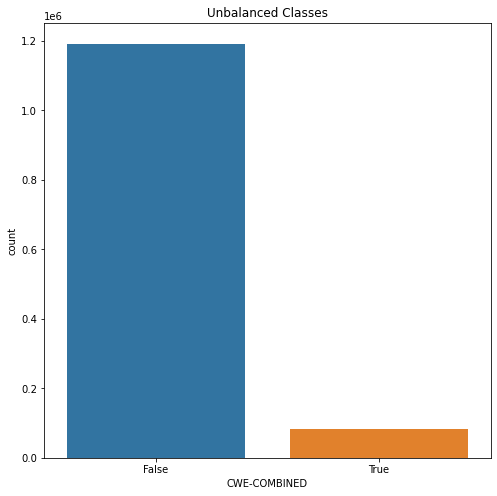

In [21]:
shuffled_df = df.sample(frac=1,random_state=4)
vul_df = shuffled_df.loc[shuffled_df['CWE-COMBINED'] == True]
non_vul_df = shuffled_df.loc[shuffled_df['CWE-COMBINED'] == False]
non_normalized_df = pd.concat([vul_df, non_vul_df])
plt.figure(figsize=(8, 8))
sns.countplot('CWE-COMBINED', data=non_normalized_df)
plt.title('Unbalanced Classes')
plt.show()

/home/feras/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


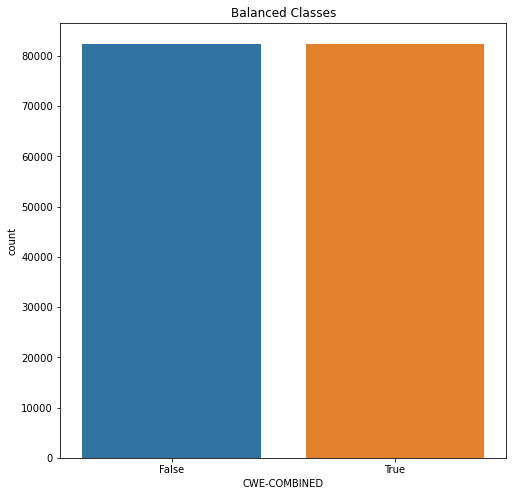

In [22]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Randomly select 82411 of observations from vulnerable class in a separate dataset.
vul_df = shuffled_df.loc[shuffled_df['CWE-COMBINED'] == True].sample(n=82411,random_state=42)

#Randomly select 82411 of observations from the non-vulnerable (majority class)to make 50/50 samples
non_vul_df = shuffled_df.loc[shuffled_df['CWE-COMBINED'] == False].sample(n=82411,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([vul_df, non_vul_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('CWE-COMBINED', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [23]:
normalized_df.reset_index(inplace=True)

In [24]:
normalized_df['index'] = normalized_df.index

In [25]:
normalized_df.head()

,index,code,CWE-COMBINED
0,0,D_check_map_window(struct Cell_head *wind)\n{\...,True
1,1,UT_convertDimensionless(const char * sz)\n{\n\...,True
2,2,"c_escape(output::pointer op, const char *s, in...",True
3,3,jack_session_commands_free(jack_session_comman...,True
4,4,"grow(Stream * s, int newlen, int need)\n{\n ...",True


In [26]:
normalized_df['type'] = "CWE_COMBINED"

In [27]:
normalized_df.head()

,index,code,CWE-COMBINED,type
0,0,D_check_map_window(struct Cell_head *wind)\n{\...,True,CWE_COMBINED
1,1,UT_convertDimensionless(const char * sz)\n{\n\...,True,CWE_COMBINED
2,2,"c_escape(output::pointer op, const char *s, in...",True,CWE_COMBINED
3,3,jack_session_commands_free(jack_session_comman...,True,CWE_COMBINED
4,4,"grow(Stream * s, int newlen, int need)\n{\n ...",True,CWE_COMBINED


reorganizing the columns in the dataframe

In [28]:
normalized_df.columns = ['testCase_ID', 'code', 'bug', 'type']

In [29]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164822 entries, 0 to 164821
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   testCase_ID  164822 non-null  int64 
 1   code         164822 non-null  object
 2   bug          164822 non-null  bool  
 3   type         164822 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 3.9+ MB


In [30]:
def add_column(row):
    testCase_ID = row.testCase_ID

    return {
        "filename": str(testCase_ID) + "_vdisc.c"
    }

Adding a "filename" column

In [31]:
filename = normalized_df.apply(add_column, axis=1, result_type="expand")

In [32]:
filename.head()

,filename
0,0_vdisc.c
1,1_vdisc.c
2,2_vdisc.c
3,3_vdisc.c
4,4_vdisc.c


In [33]:
vdisc_new= normalized_df.insert(1,"filename", filename, True)

In [34]:
normalized_df.head()

,testCase_ID,filename,code,bug,type
0,0,0_vdisc.c,D_check_map_window(struct Cell_head *wind)\n{\...,True,CWE_COMBINED
1,1,1_vdisc.c,UT_convertDimensionless(const char * sz)\n{\n\...,True,CWE_COMBINED
2,2,2_vdisc.c,"c_escape(output::pointer op, const char *s, in...",True,CWE_COMBINED
3,3,3_vdisc.c,jack_session_commands_free(jack_session_comman...,True,CWE_COMBINED
4,4,4_vdisc.c,"grow(Stream * s, int newlen, int need)\n{\n ...",True,CWE_COMBINED


saving the file as CSV

In [35]:
normalized_df.to_csv("./Dataset/vdisc_CWE_COMBINED.csv.gz")